### Stock Market Prediction And Forecasting Using Stacked LSTM

In [33]:
### Keras and Tensorflow >2.0

In [34]:
### Data Collection
import pandas_datareader as pdr
import pandas as pd

In [35]:
df = pd.read_csv('dataset/005930.KS_5y.csv')

In [36]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-30,29700.0,30000.0,29680.0,30000.0,41.274914,10588400
1,2013-10-31,29960.0,30040.0,29300.0,29300.0,40.311840,12647050
2,2013-11-01,29800.0,30000.0,29360.0,30000.0,41.274914,11357700
3,2013-11-04,29840.0,30040.0,29780.0,29980.0,41.247398,10887800
4,2013-11-05,30040.0,30040.0,29440.0,29700.0,40.862167,8009300


In [37]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1220,2018-10-23,43300.0,43450.0,42550.0,43050.0,43050.0,9531231
1221,2018-10-24,43050.0,43100.0,42250.0,42550.0,42550.0,13522825
1222,2018-10-25,40600.0,41550.0,40550.0,41000.0,41000.0,19338170
1223,2018-10-26,41100.0,41300.0,40400.0,41000.0,41000.0,14413864
1224,2018-10-29,40850.0,41950.0,40550.0,41400.0,41400.0,14460521


In [38]:
df1=df.reset_index()['Close']

In [39]:
df1

0       30000.0
1       29300.0
2       30000.0
3       29980.0
4       29700.0
         ...   
1220    43050.0
1221    42550.0
1222    41000.0
1223    41000.0
1224    41400.0
Name: Close, Length: 1225, dtype: float64

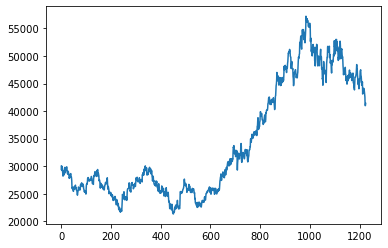

In [40]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [41]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [42]:
import numpy as np

In [43]:
df1

0       30000.0
1       29300.0
2       30000.0
3       29980.0
4       29700.0
         ...   
1220    43050.0
1221    42550.0
1222    41000.0
1223    41000.0
1224    41400.0
Name: Close, Length: 1225, dtype: float64

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [45]:
print(df1)

[[0.24136009]
 [0.22185061]
 [0.24136009]
 ...
 [0.54793757]
 [0.54793757]
 [0.55908584]]


In [46]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [47]:
training_size,test_size

(796, 429)

In [48]:
train_data

array([[0.24136009],
       [0.22185061],
       [0.24136009],
       [0.24080268],
       [0.23299889],
       [0.21404682],
       [0.20624303],
       [0.19119287],
       [0.20122631],
       [0.21683389],
       [0.19620959],
       [0.19899666],
       [0.22017837],
       [0.22686734],
       [0.23522854],
       [0.22463768],
       [0.20791527],
       [0.21348941],
       [0.22185061],
       [0.2296544 ],
       [0.22463768],
       [0.23801561],
       [0.23801561],
       [0.22296544],
       [0.21962096],
       [0.20345596],
       [0.20791527],
       [0.20122631],
       [0.21571906],
       [0.20791527],
       [0.196767  ],
       [0.19119287],
       [0.18004459],
       [0.18561873],
       [0.18283166],
       [0.18617614],
       [0.2006689 ],
       [0.2006689 ],
       [0.20401338],
       [0.19397993],
       [0.19007804],
       [0.18338907],
       [0.17001115],
       [0.13489409],
       [0.12764771],
       [0.13377926],
       [0.13210702],
       [0.124

In [49]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [50]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [51]:
print(X_train.shape), print(y_train.shape)

(695, 100)
(695,)


(None, None)

In [52]:
print(X_test.shape), print(ytest.shape)

(328, 100)
(328,)


(None, None)

In [53]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [54]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 1s 60ms/step - loss: 5.6490e-04 - val_loss: 0.0205
Epoch 2/100
11/11 [==============================] - 1s 59ms/step - loss: 5.4546e-04 - val_loss: 0.0244
Epoch 3/100
11/11 [==============================] - 1s 59ms/step - loss: 5.4330e-04 - val_loss: 0.0173
Epoch 4/100
11/11 [==============================] - 1s 60ms/step - loss: 5.3090e-04 - val_loss: 0.0247
Epoch 5/100
11/11 [==============================] - 1s 59ms/step - loss: 5.2298e-04 - val_loss: 0.0195
Epoch 6/100
11/11 [==============================] - 1s 59ms/step - loss: 5.3205e-04 - val_loss: 0.0131
Epoch 7/100
11/11 [==============================] - 1s 59ms/step - loss: 5.1091e-04 - val_loss: 0.0161
Epoch 8/100
11/11 [==============================] - 1s 59ms/step - loss: 5.5279e-04 - val_loss: 0.0207
Epoch 9/100
11/11 [==============================] - 1s 58ms/step - loss: 5.2001e-04 - val_loss: 0.0145
Epoch 10/100
11/11 [==============================] - 1s 59ms/st

11/11 [==============================] - 1s 60ms/step - loss: 3.2676e-04 - val_loss: 0.0010
Epoch 80/100
11/11 [==============================] - 1s 60ms/step - loss: 2.9551e-04 - val_loss: 0.0011
Epoch 81/100
11/11 [==============================] - 1s 60ms/step - loss: 3.1479e-04 - val_loss: 0.0014
Epoch 82/100
11/11 [==============================] - 1s 59ms/step - loss: 3.0591e-04 - val_loss: 0.0012
Epoch 83/100
11/11 [==============================] - 1s 60ms/step - loss: 2.7686e-04 - val_loss: 9.9771e-04
Epoch 84/100
11/11 [==============================] - 1s 59ms/step - loss: 2.8397e-04 - val_loss: 9.9869e-04
Epoch 85/100
11/11 [==============================] - 1s 59ms/step - loss: 2.9305e-04 - val_loss: 0.0010
Epoch 86/100
11/11 [==============================] - 1s 59ms/step - loss: 3.1741e-04 - val_loss: 0.0010
Epoch 87/100
11/11 [==============================] - 1s 59ms/step - loss: 2.8955e-04 - val_loss: 0.0023
Epoch 88/100
11/11 [==============================] - 1s 60m

In [79]:
import tensorflow as tf

In [80]:
tf.__version__

'2.7.0'

In [81]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [82]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [83]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

27385.09222410256

In [84]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

48786.64329045688

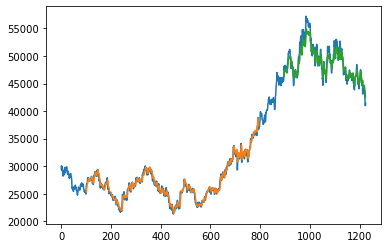

In [85]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [86]:
len(test_data)

429

In [98]:
x_input=test_data[329:].reshape(1,-1)
x_input.shape


(1, 100)

In [99]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [100]:
temp_input

[0.8182831661092531,
 0.835005574136009,
 0.8294314381270904,
 0.835005574136009,
 0.8154960981047938,
 0.7890189520624304,
 0.7959866220735787,
 0.7820512820512822,
 0.7486064659977705,
 0.7332775919732442,
 0.7040133779264215,
 0.7151616499442586,
 0.7151616499442586,
 0.7165551839464883,
 0.7221293199554069,
 0.705406911928651,
 0.7151616499442586,
 0.7416387959866222,
 0.70958751393534,
 0.705406911928651,
 0.6747491638795986,
 0.6914715719063544,
 0.6942586399108139,
 0.6858974358974359,
 0.6566332218506132,
 0.6761426978818283,
 0.6956521739130435,
 0.6872909698996656,
 0.6733556298773691,
 0.7012263099219622,
 0.6886845039018952,
 0.6831103678929766,
 0.7026198439241917,
 0.7123745819397993,
 0.7277034559643256,
 0.7012263099219622,
 0.6914715719063544,
 0.6914715719063544,
 0.7123745819397993,
 0.7123745819397993,
 0.7012263099219622,
 0.6942586399108139,
 0.7026198439241917,
 0.6747491638795986,
 0.6803232998885174,
 0.6817168338907469,
 0.7068004459308808,
 0.70958751393534,


In [101]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5830005]
101
1 day input [0.83500557 0.82943144 0.83500557 0.8154961  0.78901895 0.79598662
 0.78205128 0.74860647 0.73327759 0.70401338 0.71516165 0.71516165
 0.71655518 0.72212932 0.70540691 0.71516165 0.7416388  0.70958751
 0.70540691 0.67474916 0.69147157 0.69425864 0.68589744 0.65663322
 0.6761427  0.69565217 0.68729097 0.67335563 0.70122631 0.6886845
 0.68311037 0.70261984 0.71237458 0.72770346 0.70122631 0.69147157
 0.69147157 0.71237458 0.71237458 0.70122631 0.69425864 0.70261984
 0.67474916 0.6803233  0.68171683 0.70680045 0.70958751 0.71237458
 0.67056856 0.66081382 0.66360089 0.63851728 0.63433668 0.62736901
 0.65384615 0.69007804 0.69286511 0.69147157 0.69565217 0.70261984
 0.70958751 0.73327759 0.75557414 0.72770346 0.73327759 0.70401338
 0.69007804 0.65663322 0.67335563 0.66081382 0.64687848 0.63294314
 0.68311037 0.66360089 0.67335563 0.69147157 0.72212932 0.72630992
 0.72909699 0.69983278 0.69704571 0.67892977 0.65105909 0.65105909
 0.65802676 0.66778149 0.606466   0

8 day output [[0.64042294]]
9 day input [0.73327759 0.70401338 0.71516165 0.71516165 0.71655518 0.72212932
 0.70540691 0.71516165 0.7416388  0.70958751 0.70540691 0.67474916
 0.69147157 0.69425864 0.68589744 0.65663322 0.6761427  0.69565217
 0.68729097 0.67335563 0.70122631 0.6886845  0.68311037 0.70261984
 0.71237458 0.72770346 0.70122631 0.69147157 0.69147157 0.71237458
 0.71237458 0.70122631 0.69425864 0.70261984 0.67474916 0.6803233
 0.68171683 0.70680045 0.70958751 0.71237458 0.67056856 0.66081382
 0.66360089 0.63851728 0.63433668 0.62736901 0.65384615 0.69007804
 0.69286511 0.69147157 0.69565217 0.70261984 0.70958751 0.73327759
 0.75557414 0.72770346 0.73327759 0.70401338 0.69007804 0.65663322
 0.67335563 0.66081382 0.64687848 0.63294314 0.68311037 0.66360089
 0.67335563 0.69147157 0.72212932 0.72630992 0.72909699 0.69983278
 0.69704571 0.67892977 0.65105909 0.65105909 0.65802676 0.66778149
 0.606466   0.63154961 0.62597547 0.62040134 0.63573021 0.63294314
 0.62876254 0.6190078  

17 day output [[0.6464716]]
18 day input [0.70958751 0.70540691 0.67474916 0.69147157 0.69425864 0.68589744
 0.65663322 0.6761427  0.69565217 0.68729097 0.67335563 0.70122631
 0.6886845  0.68311037 0.70261984 0.71237458 0.72770346 0.70122631
 0.69147157 0.69147157 0.71237458 0.71237458 0.70122631 0.69425864
 0.70261984 0.67474916 0.6803233  0.68171683 0.70680045 0.70958751
 0.71237458 0.67056856 0.66081382 0.66360089 0.63851728 0.63433668
 0.62736901 0.65384615 0.69007804 0.69286511 0.69147157 0.69565217
 0.70261984 0.70958751 0.73327759 0.75557414 0.72770346 0.73327759
 0.70401338 0.69007804 0.65663322 0.67335563 0.66081382 0.64687848
 0.63294314 0.68311037 0.66360089 0.67335563 0.69147157 0.72212932
 0.72630992 0.72909699 0.69983278 0.69704571 0.67892977 0.65105909
 0.65105909 0.65802676 0.66778149 0.606466   0.63154961 0.62597547
 0.62040134 0.63573021 0.63294314 0.62876254 0.6190078  0.60507246
 0.59113712 0.54793757 0.54793757 0.55908584 0.58300048 0.59933829
 0.61460733 0.6268251

26 day output [[0.66190726]]
27 day input [0.68729097 0.67335563 0.70122631 0.6886845  0.68311037 0.70261984
 0.71237458 0.72770346 0.70122631 0.69147157 0.69147157 0.71237458
 0.71237458 0.70122631 0.69425864 0.70261984 0.67474916 0.6803233
 0.68171683 0.70680045 0.70958751 0.71237458 0.67056856 0.66081382
 0.66360089 0.63851728 0.63433668 0.62736901 0.65384615 0.69007804
 0.69286511 0.69147157 0.69565217 0.70261984 0.70958751 0.73327759
 0.75557414 0.72770346 0.73327759 0.70401338 0.69007804 0.65663322
 0.67335563 0.66081382 0.64687848 0.63294314 0.68311037 0.66360089
 0.67335563 0.69147157 0.72212932 0.72630992 0.72909699 0.69983278
 0.69704571 0.67892977 0.65105909 0.65105909 0.65802676 0.66778149
 0.606466   0.63154961 0.62597547 0.62040134 0.63573021 0.63294314
 0.62876254 0.6190078  0.60507246 0.59113712 0.54793757 0.54793757
 0.55908584 0.58300048 0.59933829 0.61460733 0.62682515 0.6353476
 0.64025855 0.64214802 0.64188808 0.64042294 0.63860303 0.63708025
 0.63626838 0.63634962

In [102]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [103]:
import matplotlib.pyplot as plt

In [104]:
len(df1)

1225

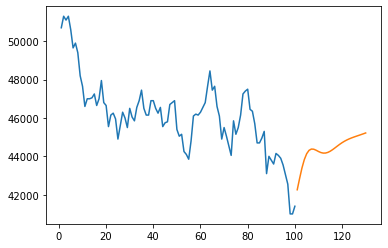

In [105]:
plt.plot(day_new,scaler.inverse_transform(df1[1125:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))